# ML441 Assignment 2 Code
## David Nicolay 26296918

### Imports

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import time


### Load data

In [2]:
df = pd.read_csv('forestCover.csv', na_values='?')

In [3]:
df.describe()

,Elevation,Aspect,Facet,Slope,Inclination,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Water_Level,Observation_ID,Cover_Type
count,5.810120e+05,581012.000000,581012.000000,580714.000000,581012.000000,5.810120e+05,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.0,581012.000000
mean,3.270099e+06,155.656807,389.919334,14.103738,-0.000484,5.062486e+03,46.418855,2350.146611,212.146049,223.318716,...,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,290507.500000,1.0,2.051471
std,3.093831e+05,111.913721,280.343296,7.488058,0.577741,9.523308e+05,58.295232,1559.254870,26.769889,19.768697,...,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,167723.861639,0.0,1.396504
min,2.054195e+06,0.000000,0.000000,0.000000,-0.999999,0.000000e+00,-173.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.0,1.000000
25%,3.103945e+06,58.000000,145.490941,9.000000,-0.500539,1.080000e+02,7.000000,1106.000000,198.000000,213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145254.750000,1.0,1.000000
50%,3.310580e+06,127.000000,318.159602,13.000000,-0.001062,2.180000e+02,30.000000,1997.000000,218.000000,226.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,290507.500000,1.0,2.000000
75%,3.495115e+06,260.000000,652.528985,18.000000,0.500932,3.840000e+02,69.000000,3328.000000,231.000000,237.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,435760.250000,1.0,2.000000
max,4.263090e+06,360.000000,903.413405,66.000000,0.999992,3.742899e+08,601.000000,7117.000000,254.000000,254.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,581013.000000,1.0,7.000000


In [4]:
df.columns

Index(['Elevation', 'Aspect', 'Facet', 'Slope', 'Inclination',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'So

In [5]:
# check for columns containing non-numeric values, return the columns containing non numeric
def check_non_numeric(df):
    non_numeric_cols = df.columns[~df.applymap(lambda x: isinstance(x, (int, float))).all()]
    if not non_numeric_cols.empty:
        print("Non-numeric columns found:")
        print(non_numeric_cols)
    else:
        print("No non-numeric columns found.")
    return non_numeric_cols

check_non_numeric(df)


/tmp/ipykernel_44797/567723742.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_numeric_cols = df.columns[~df.applymap(lambda x: isinstance(x, (int, float))).all()]


Non-numeric columns found:
Index(['Soil_Type1'], dtype='object')


Index(['Soil_Type1'], dtype='object')

In [6]:
df.iloc[40]

Elevation                                2246465
Aspect                                       324
Facet                                 812.210796
Slope                                       24.0
Inclination                              0.70092
Horizontal_Distance_To_Hydrology             240
Vertical_Distance_To_Hydrology                61
Horizontal_Distance_To_Roadways              564
Hillshade_9am                                155
Hillshade_Noon                               207
Hillshade_3pm                                189
Horizontal_Distance_To_Fire_Points           641
Wilderness_Area1                               0
Wilderness_Area2                               0
Wilderness_Area3                               0
Wilderness_Area4                               1
Soil_Type1                              positive
Soil_Type2                                     0
Soil_Type3                                     0
Soil_Type4                                     0
Soil_Type5          

In [7]:
df['Soil_Type1']

0         positive
1         positive
2         positive
3         positive
4         positive
            ...   
581007    positive
581008    positive
581009    positive
581010    positive
581011    positive
Name: Soil_Type1, Length: 581012, dtype: object

### kNN Preprocessing

In [8]:
knn_df = df.copy()

In [9]:
knn_df.columns

Index(['Elevation', 'Aspect', 'Facet', 'Slope', 'Inclination',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'So

In [10]:
# 1. Remove observation ID feature
knn_df = knn_df.drop(columns=['Observation_ID'])


In [11]:
# 2. Remove constant feature
knn_df = knn_df.drop(columns=['Water_Level'])

In [12]:
# 3. Normalise numeric features to range [0, 1]
# first 10 columns are numeric features
numeric_cols = knn_df.columns[:10]
knn_df[numeric_cols] = (knn_df[numeric_cols] - knn_df[numeric_cols].min()) / (knn_df[numeric_cols].max() - knn_df[numeric_cols].min())

In [13]:
# check
knn_df[numeric_cols].describe()

,Elevation,Aspect,Facet,Slope,Inclination,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon
count,581012.000000,581012.000000,581012.000000,580714.000000,581012.000000,5.810120e+05,581012.000000,581012.000000,581012.000000,581012.000000
mean,0.550458,0.432380,0.431607,0.213693,0.499759,1.352557e-05,0.283487,0.330216,0.835221,0.879208
std,0.140062,0.310871,0.310316,0.113455,0.288872,2.544367e-03,0.075317,0.219089,0.105393,0.077830
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.475238,0.161111,0.161046,0.136364,0.249731,2.885464e-07,0.232558,0.155403,0.779528,0.838583
50%,0.568784,0.352778,0.352175,0.196970,0.499471,5.824362e-07,0.262274,0.280596,0.858268,0.889764
75%,0.652326,0.722222,0.722293,0.272727,0.750469,1.025943e-06,0.312661,0.467613,0.909449,0.933071
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000


In [14]:
# 4. Handle missing values
# count na >0
knn_df.isna().sum()[knn_df.isna().sum() > 0]

Slope    298
dtype: int64

In [15]:
imputer = KNNImputer(n_neighbors=5)  # You can adjust n_neighbors as needed
# Only impute the Slope column, but KNNImputer expects 2D input, so use double brackets
slope_values = knn_df[['Slope']]
knn_df['Slope'] = imputer.fit_transform(slope_values)

In [16]:
knn_df.isna().sum()[knn_df.isna().sum() > 0]

Series([], dtype: int64)

In [17]:
# 5. Address feature correlation
# check how much correlation between Facet and Aspect
correlation = knn_df['Facet'].corr(knn_df['Aspect'])
print(correlation)

0.9999980536139257


In [18]:
# drop highly correlated features
knn_df = knn_df.drop(columns=['Facet'])

In [19]:
# 6. Handle mixed data type
# check Soil_Type1
print(knn_df['Soil_Type1'].value_counts())

Soil_Type1
positive    577981
negative      3031
Name: count, dtype: int64


In [20]:
# encode as 1 for positive and 0 for negative
knn_df['Soil_Type1'] = knn_df['Soil_Type1'].apply(lambda x: 1 if x == 'positive' else 0)

In [21]:
print(knn_df['Soil_Type1'].value_counts())

Soil_Type1
1    577981
0      3031
Name: count, dtype: int64


In [22]:
# 7. Remove noise feature ['Inclination']
knn_df = knn_df.drop(columns=['Inclination'], errors='ignore')

In [29]:
# 8. Apply SMOTETomek
print("Before SMOTETomek:")
print(knn_df['Cover_Type'].value_counts().sort_index())

# Separate features and target
X = knn_df.drop('Cover_Type', axis=1)
y = knn_df['Cover_Type']

# Calculate target distribution - minority classes to 20% of majority class
majority_class_count = y.value_counts().max()  # 283301
target_minority_count = int(0.2 * majority_class_count)  # 20% of majority

print(f"\nMajority class count: {majority_class_count}")
print(f"Target count for minority classes: {target_minority_count}")

# Create custom sampling strategy for SMOTE component
# Keep majority class as is, oversample minorities to 20% of majority
sampling_strategy = {}
for class_label in y.unique():
    current_count = (y == class_label).sum()
    if current_count < target_minority_count:
        sampling_strategy[class_label] = target_minority_count
    else:
        sampling_strategy[class_label] = current_count  # Keep original count

print(f"\nSampling strategy: {sampling_strategy}")

# Apply SMOTETomek with custom sampling strategy
# SMOTETomek = SMOTE + Tomek links removal for better boundary cleaning
smotetomek = SMOTETomek(smote=SMOTE(sampling_strategy=sampling_strategy, random_state=42), random_state=42)
X_resampled, y_resampled = smotetomek.fit_resample(X, y)

print("\nAfter SMOTETomek:")
print(pd.Series(y_resampled).value_counts().sort_index())

# Update knn_df with resampled data
knn_df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
knn_df_balanced['Cover_Type'] = y_resampled

print(f"\nOriginal dataset size: {len(knn_df):,}")
print(f"Balanced dataset size: {len(knn_df_balanced):,}")
print(f"Size change factor: {len(knn_df_balanced)/len(knn_df):.2f}x")

# Additional information about SMOTETomek
print(f"\nSMOTETomek combines:")
print("1. SMOTE: Synthetic Minority Oversampling Technique")
print("2. Tomek Links: Removes noisy samples and improves class boundaries")
print("This should result in better quality synthetic samples and cleaner decision boundaries.")

Before SMOTETomek:
Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64

Majority class count: 283301
Target count for minority classes: 56660

Sampling strategy: {np.int64(2): np.int64(283301), np.int64(3): 56660, np.int64(1): np.int64(211840), np.int64(7): 56660, np.int64(6): 56660, np.int64(5): 56660, np.int64(4): 56660}

After SMOTETomek:
Cover_Type
1    158427
2    225918
3     51348
4     55939
5     52090
6     52642
7     52533
Name: count, dtype: int64

Original dataset size: 581,012
Balanced dataset size: 648,897
Size change factor: 1.12x

SMOTETomek combines:
1. SMOTE: Synthetic Minority Oversampling Technique
2. Tomek Links: Removes noisy samples and improves class boundaries
This should result in better quality synthetic samples and cleaner decision boundaries.

After SMOTETomek:
Cover_Type
1    158427
2    225918
3     51348
4     55939
5     52090
6     52642
7     52533
Name: count, dtype: int64

Origin

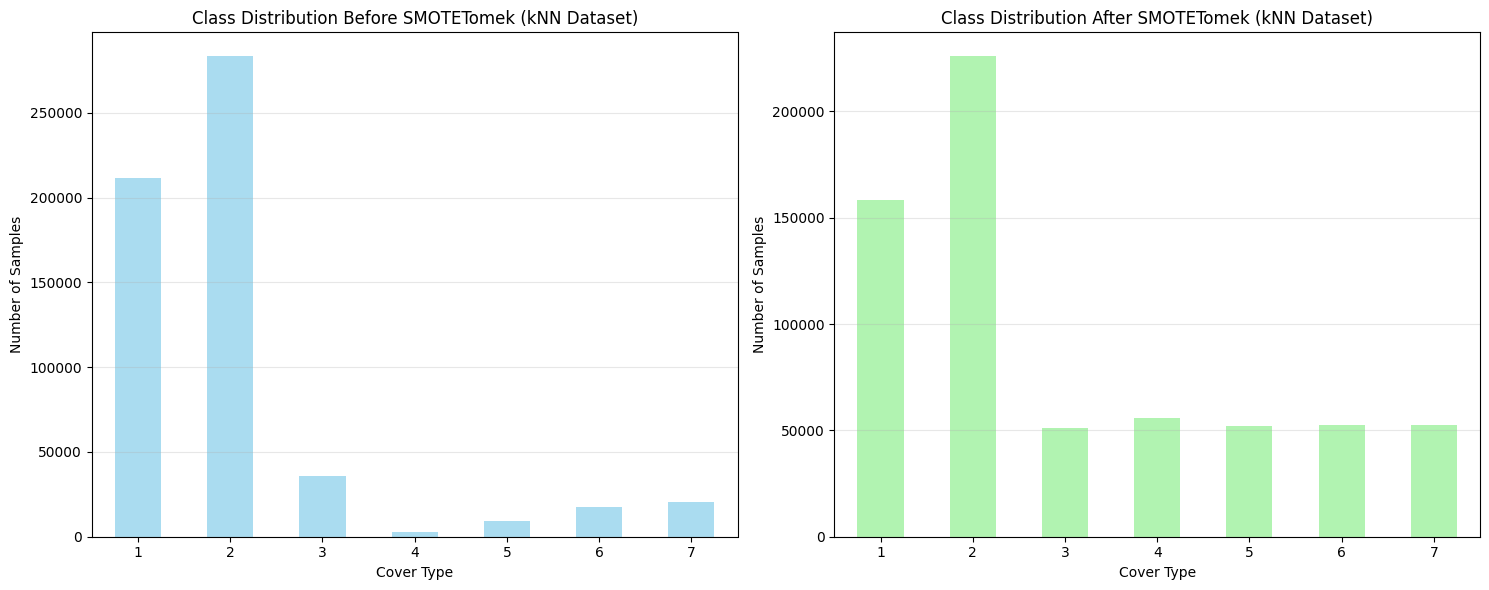


SMOTETomek Summary for kNN Dataset:
- Minority classes oversampled to 20% of majority class size
- Tomek links removed for cleaner class boundaries
- Majority class (2): 225,918 samples
- Class 1: 158,427 samples
- Class 3: 51,348 samples
- Class 4: 55,939 samples
- Class 5: 52,090 samples
- Class 6: 52,642 samples
- Class 7: 52,533 samples
- Total dataset change: +11.7%
- SMOTETomek may reduce some samples due to Tomek link removal


In [30]:
# Visualize the class distribution before and after SMOTETomek
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Before SMOTETomek
y.value_counts().sort_index().plot(kind='bar', ax=ax1, color='skyblue', alpha=0.7)
ax1.set_title('Class Distribution Before SMOTETomek (kNN Dataset)')
ax1.set_xlabel('Cover Type')
ax1.set_ylabel('Number of Samples')
ax1.tick_params(axis='x', rotation=0)
ax1.grid(axis='y', alpha=0.3)

# After SMOTETomek
pd.Series(y_resampled).value_counts().sort_index().plot(kind='bar', ax=ax2, color='lightgreen', alpha=0.7)
ax2.set_title('Class Distribution After SMOTETomek (kNN Dataset)')
ax2.set_xlabel('Cover Type')
ax2.set_ylabel('Number of Samples')
ax2.tick_params(axis='x', rotation=0)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print("\nSMOTETomek Summary for kNN Dataset:")
print(f"- Minority classes oversampled to 20% of majority class size")
print(f"- Tomek links removed for cleaner class boundaries")
current_counts = pd.Series(y_resampled).value_counts().sort_index()
print(f"- Majority class (2): {current_counts[2]:,} samples")
print(f"- Class 1: {current_counts[1]:,} samples")
for i in [3, 4, 5, 6, 7]:
    print(f"- Class {i}: {current_counts[i]:,} samples")
print(f"- Total dataset change: {((len(knn_df_balanced) - len(knn_df)) / len(knn_df) * 100):+.1f}%")
print(f"- SMOTETomek may reduce some samples due to Tomek link removal")

### Classification trees preprocessing

In [21]:
ct_df = df.copy()

In [22]:
# 1. Remove unique id feature
ct_df = ct_df.drop(columns=['Observation_ID'], errors='ignore')

In [23]:
# 2. Remove constant features ('Water_Level')
ct_df = ct_df.drop(columns=['Water_Level'], errors='ignore')

In [24]:
# 3. Address class imbalance
# Check class distribution first
print("Cover_Type distribution:")
print(ct_df['Cover_Type'].value_counts().sort_index())
print("\nClass distribution percentages:")
print(ct_df['Cover_Type'].value_counts(normalize=True).sort_index() * 100)

Cover_Type distribution:
Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64

Class distribution percentages:
Cover_Type
1    36.460521
2    48.759922
3     6.153746
4     0.472796
5     1.633873
6     2.989095
7     3.530048
Name: proportion, dtype: float64


In [25]:
# First handle categorical data - encode Soil_Type1
print("Unique values in Soil_Type1:", ct_df['Soil_Type1'].unique())
ct_df['Soil_Type1'] = ct_df['Soil_Type1'].apply(lambda x: 1 if x == 'positive' else 0)

# Check for missing values
print("\nMissing values per column:")
missing_values = ct_df.isnull().sum()
print(missing_values[missing_values > 0])

# Handle missing values using KNN imputation for numerical features only
from sklearn.impute import KNNImputer

if missing_values.sum() > 0:
    # Apply KNN imputation only to columns with missing values
    cols_with_missing = missing_values[missing_values > 0].index.tolist()
    print(f"\nApplying KNN imputation to columns: {cols_with_missing}")
    
    imputer = KNNImputer(n_neighbors=5)
    ct_df[cols_with_missing] = imputer.fit_transform(ct_df[cols_with_missing])
    
    print("Missing values after imputation:")
    print(ct_df.isnull().sum().sum())

# Apply SMOTE to address class imbalance
# Separate features and target
X = ct_df.drop('Cover_Type', axis=1)
y = ct_df['Cover_Type']

print("\nBefore SMOTE:")
print("Dataset shape:", X.shape)
print("Class distribution:")
print(y.value_counts().sort_index())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nAfter SMOTE:")
print("Dataset shape:", X_resampled.shape)
print("Class distribution:")
print(pd.Series(y_resampled).value_counts().sort_index())

# Create new balanced dataframe
ct_df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
ct_df_balanced['Cover_Type'] = y_resampled

print("\nBalanced dataset shape:", ct_df_balanced.shape)

Unique values in Soil_Type1: ['positive' 'negative']



Missing values per column:
Slope    298
dtype: int64

Applying KNN imputation to columns: ['Slope']
Missing values after imputation:
0

Before SMOTE:
Dataset shape: (581012, 56)
Class distribution:
Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64
Missing values after imputation:
0

Before SMOTE:
Dataset shape: (581012, 56)
Class distribution:
Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64

After SMOTE:
Dataset shape: (1983107, 56)
Class distribution:
Cover_Type
1    283301
2    283301
3    283301
4    283301
5    283301
6    283301
7    283301
Name: count, dtype: int64

Balanced dataset shape: (1983107, 57)

After SMOTE:
Dataset shape: (1983107, 56)
Class distribution:
Cover_Type
1    283301
2    283301
3    283301
4    283301
5    283301
6    283301
7    283301
Name: count, dtype: int64

Balanced dataset shape: (1983107, 57)


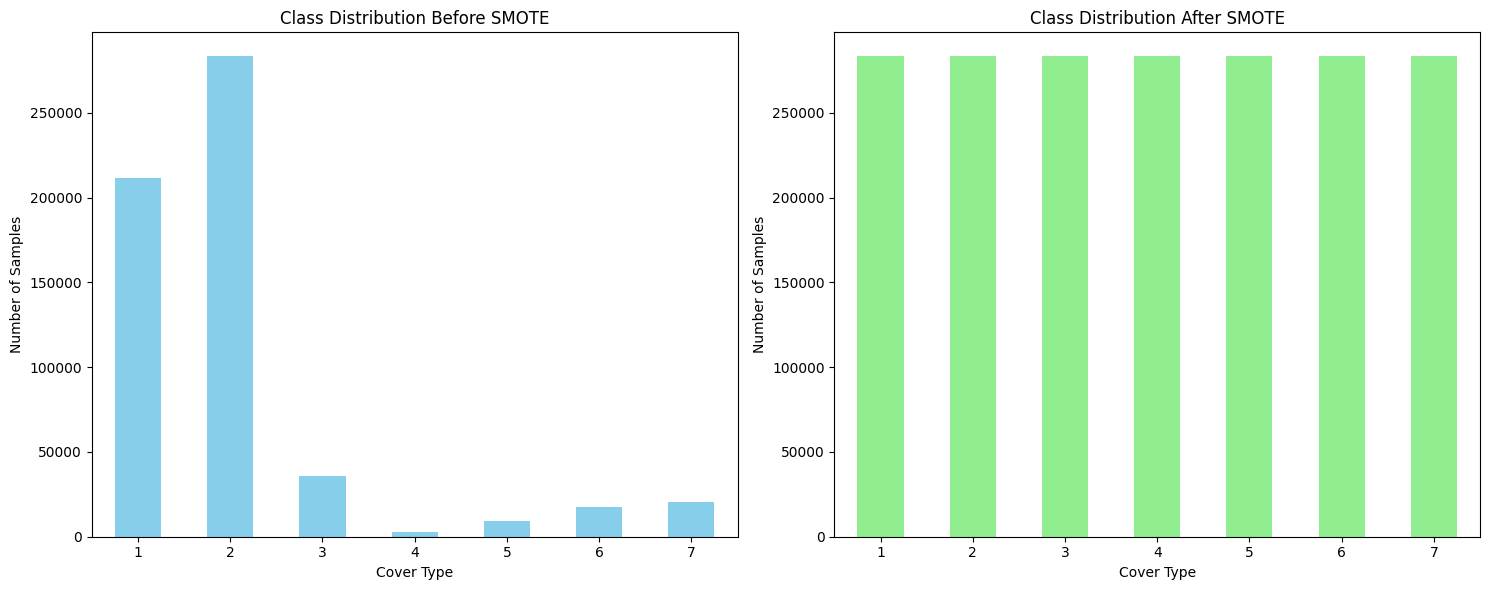

Summary:
Original dataset size: 581,012 samples
Balanced dataset size: 1,983,107 samples
Increase factor: 3.41x


In [26]:
# Visualize the class distribution before and after SMOTE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Before SMOTE
y.value_counts().sort_index().plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Class Distribution Before SMOTE')
ax1.set_xlabel('Cover Type')
ax1.set_ylabel('Number of Samples')
ax1.tick_params(axis='x', rotation=0)

# After SMOTE
pd.Series(y_resampled).value_counts().sort_index().plot(kind='bar', ax=ax2, color='lightgreen')
ax2.set_title('Class Distribution After SMOTE')
ax2.set_xlabel('Cover Type')
ax2.set_ylabel('Number of Samples')
ax2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("Summary:")
print(f"Original dataset size: {len(y):,} samples")
print(f"Balanced dataset size: {len(y_resampled):,} samples")
print(f"Increase factor: {len(y_resampled)/len(y):.2f}x")

Summary of SMOTE Implementation:
Preprocessed the data:

Encoded the categorical Soil_Type1 feature (positive → 1, negative → 0)
Handled missing values in the Slope column using KNN imputation
Applied SMOTE oversampling:

Before SMOTE: Severe class imbalance with class 4 having only 2,747 samples (0.47%) and class 2 being the majority with 283,301 samples (48.76%)
After SMOTE: Perfect balance with all 7 classes having exactly 283,301 samples each
Results:

Original dataset: 581,012 samples
Balanced dataset: 1,983,107 samples
Increase factor: 3.41x
All classes now have equal representation
Created balanced dataset: The ct_df_balanced dataframe now contains the oversampled data that you can use for training classification trees.



### Implement kNN

In [27]:
# 70 - 30 Split

# Separate features and target
X = knn_df.drop('Cover_Type', axis=1)
y = knn_df['Cover_Type']

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=61, stratify=y
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Train class distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Test class distribution:\n{y_test.value_counts(normalize=True)}")

Train shape: (406708, 55), Test shape: (174304, 55)
Train class distribution:
Cover_Type
2    0.487598
1    0.364606
3    0.061538
7    0.035301
6    0.029891
5    0.016339
4    0.004728
Name: proportion, dtype: float64
Test class distribution:
Cover_Type
2    0.487602
1    0.364604
3    0.061536
7    0.035300
6    0.029890
5    0.016339
4    0.004727
Name: proportion, dtype: float64


In [ ]:


# Scale the features for KNN (important for distance-based algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Basic KNN model first
knn_basic = KNeighborsClassifier(n_neighbors=5)
knn_basic.fit(X_train_scaled, y_train)

# Basic predictions and evaluation
y_pred_basic = knn_basic.predict(X_test_scaled)
basic_accuracy = accuracy_score(y_test, y_pred_basic)
print(f"Basic KNN (k=5) Accuracy: {basic_accuracy:.4f}")

# Print classification report for basic model
print("\nBasic KNN Classification Report:")
print(classification_report(y_test, y_pred_basic))

Basic KNN (k=5) Accuracy: 0.8718

Basic KNN Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.86      0.87     63552
           2       0.88      0.91      0.89     84991
           3       0.84      0.85      0.85     10726
           4       0.78      0.63      0.69       824
           5       0.73      0.57      0.64      2848
           6       0.73      0.67      0.70      5210
           7       0.89      0.88      0.88      6153

    accuracy                           0.87    174304
   macro avg       0.82      0.77      0.79    174304
weighted avg       0.87      0.87      0.87    174304



In [30]:
# Hyperparameter tuning for KNN
print("Starting KNN hyperparameter tuning...")
print("This may take some time due to the large dataset size...")

# Define parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Use 5-fold cross-validation for hyperparameter tuning
# Using fewer folds to reduce computation time given the large dataset
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search with cross-validation
start_time = time.time()
grid_search_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    cv=kfold,
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=1   # Show progress
)

# Fit on a subset of data for faster hyperparameter tuning
# Use 20% of training data to speed up the process
subset_size = int(0.2 * len(X_train_scaled))
indices = np.random.choice(len(X_train_scaled), subset_size, replace=False)
X_train_subset = X_train_scaled[indices]
y_train_subset = y_train.iloc[indices]

grid_search_knn.fit(X_train_subset, y_train_subset)

tuning_time = time.time() - start_time
print(f"\nHyperparameter tuning completed in {tuning_time:.2f} seconds")

# Best parameters
print(f"Best KNN parameters: {grid_search_knn.best_params_}")
print(f"Best cross-validation score: {grid_search_knn.best_score_:.4f}")

# Train the optimal KNN model on full training set
optimal_knn = grid_search_knn.best_estimator_
optimal_knn.fit(X_train_scaled, y_train)

Starting KNN hyperparameter tuning...
This may take some time due to the large dataset size...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Hyperparameter tuning completed in 370.43 seconds
Best KNN parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation score: 0.8323


,n_neighbors,5
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'manhattan'
,metric_params,None
,n_jobs,None


In [31]:
# Evaluate optimal KNN model
print("\n=== KNN Model Evaluation ===")

# Predictions on test set
y_pred_knn = optimal_knn.predict(X_test_scaled)
knn_test_accuracy = accuracy_score(y_test, y_pred_knn)

print(f"Optimal KNN Test Accuracy: {knn_test_accuracy:.4f}")

# Detailed classification report
print("\nOptimal KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
print("\nKNN Confusion Matrix:")
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

# K-fold cross-validation on the optimal model
print("\nPerforming 10-fold cross-validation for KNN...")
cv_scores_knn = cross_val_score(optimal_knn, X_train_scaled, y_train, cv=10, scoring='accuracy', n_jobs=-1)

print(f"KNN 10-fold CV Scores: {cv_scores_knn}")
print(f"KNN Mean CV Accuracy: {cv_scores_knn.mean():.4f} (+/- {cv_scores_knn.std() * 2:.4f})")
print(f"KNN CV Score Range: [{cv_scores_knn.min():.4f}, {cv_scores_knn.max():.4f}]")


=== KNN Model Evaluation ===
Optimal KNN Test Accuracy: 0.8931

Optimal KNN Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.88      0.89     63552
           2       0.90      0.92      0.91     84991
           3       0.87      0.87      0.87     10726
           4       0.83      0.68      0.74       824
           5       0.78      0.66      0.71      2848
           6       0.76      0.75      0.75      5210
           7       0.92      0.90      0.91      6153

    accuracy                           0.89    174304
   macro avg       0.85      0.81      0.83    174304
weighted avg       0.89      0.89      0.89    174304


KNN Confusion Matrix:
[[56059  6957     9     0    82    23   422]
 [ 5426 78354   384     2   409   351    65]
 [   15   447  9384    80    30   770     0]
 [    0     3   192   559     0    70     0]
 [  103   803    52     0  1869    21     0]
 [   23   408   821    36    18  3904     0]
 [  531   

### Implement Classification Trees (Decision Trees)

Now we'll implement and optimize Decision Trees for the forest cover classification problem. Decision Trees are particularly well-suited for this type of problem because they can handle both numerical and categorical features naturally and provide interpretable results.

In [29]:
# Import Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Prepare data for Decision Trees using the balanced dataset (ct_df_balanced)
# Decision trees don't require feature scaling, so we can use the original features

# Separate features and target from balanced dataset
X_balanced = ct_df_balanced.drop('Cover_Type', axis=1)
y_balanced = ct_df_balanced['Cover_Type']

print(f"Balanced dataset shape: {X_balanced.shape}")
print(f"Class distribution in balanced dataset:")
print(y_balanced.value_counts().sort_index())

# Split the balanced data
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced
)

print(f"\nDecision Tree Train shape: {X_train_dt.shape}, Test shape: {X_test_dt.shape}")

# Basic Decision Tree model
dt_basic = DecisionTreeClassifier(random_state=42)
dt_basic.fit(X_train_dt, y_train_dt)

# Basic predictions and evaluation
y_pred_dt_basic = dt_basic.predict(X_test_dt)
dt_basic_accuracy = accuracy_score(y_test_dt, y_pred_dt_basic)
print(f"\nBasic Decision Tree Accuracy: {dt_basic_accuracy:.4f}")

# Print classification report for basic model
print("\nBasic Decision Tree Classification Report:")
print(classification_report(y_test_dt, y_pred_dt_basic))

Balanced dataset shape: (1983107, 56)
Class distribution in balanced dataset:
Cover_Type
1    283301
2    283301
3    283301
4    283301
5    283301
6    283301
7    283301
Name: count, dtype: int64

Decision Tree Train shape: (1388174, 56), Test shape: (594933, 56)

Decision Tree Train shape: (1388174, 56), Test shape: (594933, 56)

Basic Decision Tree Accuracy: 0.9626

Basic Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.93      0.94     84990
           2       0.94      0.93      0.93     84990
           3       0.95      0.95      0.95     84990
           4       0.99      0.99      0.99     84991
           5       0.98      0.99      0.99     84991
           6       0.95      0.96      0.95     84990
           7       0.99      0.99      0.99     84991

    accuracy                           0.96    594933
   macro avg       0.96      0.96      0.96    594933
weighted avg       0.96      0.96      0.

In [31]:
# Hyperparameter tuning for Decision Trees
print("Starting Decision Tree hyperparameter tuning...")

# Define parameter grid for Decision Trees
param_grid_dt = {
    'max_depth': [10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

# Grid search with cross-validation for Decision Trees
start_time = time.time()
grid_search_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=1   # Show progress
)

# Use a subset for faster hyperparameter tuning due to large dataset size
subset_size_dt = int(0.1 * len(X_train_dt))  # Use 10% for DT tuning
indices_dt = np.random.choice(len(X_train_dt), subset_size_dt, replace=False)
X_train_dt_subset = X_train_dt.iloc[indices_dt]
y_train_dt_subset = y_train_dt.iloc[indices_dt]

print(f"Using subset of {subset_size_dt} samples for hyperparameter tuning")

grid_search_dt.fit(X_train_dt_subset, y_train_dt_subset)

dt_tuning_time = time.time() - start_time
print(f"\nDecision Tree hyperparameter tuning completed in {dt_tuning_time:.2f} seconds")

# Best parameters
print(f"Best Decision Tree parameters: {grid_search_dt.best_params_}")
print(f"Best cross-validation score: {grid_search_dt.best_score_:.4f}")

# Train the optimal Decision Tree model on full training set
optimal_dt = grid_search_dt.best_estimator_
optimal_dt.fit(X_train_dt, y_train_dt)

Starting Decision Tree hyperparameter tuning...


NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
# Evaluate optimal Decision Tree model
print("\n=== Decision Tree Model Evaluation ===")

# Predictions on test set
y_pred_dt = optimal_dt.predict(X_test_dt)
dt_test_accuracy = accuracy_score(y_test_dt, y_pred_dt)

print(f"Optimal Decision Tree Test Accuracy: {dt_test_accuracy:.4f}")

# Detailed classification report
print("\nOptimal Decision Tree Classification Report:")
print(classification_report(y_test_dt, y_pred_dt))

# Confusion Matrix
print("\nDecision Tree Confusion Matrix:")
cm_dt = confusion_matrix(y_test_dt, y_pred_dt)
print(cm_dt)

# K-fold cross-validation on the optimal model
print("\nPerforming 10-fold cross-validation for Decision Tree...")
cv_scores_dt = cross_val_score(optimal_dt, X_train_dt, y_train_dt, cv=10, scoring='accuracy', n_jobs=-1)

print(f"Decision Tree 10-fold CV Scores: {cv_scores_dt}")
print(f"Decision Tree Mean CV Accuracy: {cv_scores_dt.mean():.4f} (+/- {cv_scores_dt.std() * 2:.4f})")
print(f"Decision Tree CV Score Range: [{cv_scores_dt.min():.4f}, {cv_scores_dt.max():.4f}]")

# Feature importance analysis
print("\nTop 10 Most Important Features (Decision Tree):")
feature_importance = pd.DataFrame({
    'feature': X_balanced.columns,
    'importance': optimal_dt.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.head(10))


=== Decision Tree Model Evaluation ===
Optimal Decision Tree Test Accuracy: 0.9656

Optimal Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     84990
           2       0.94      0.94      0.94     84990
           3       0.96      0.95      0.95     84990
           4       0.99      0.99      0.99     84991
           5       0.99      0.99      0.99     84991
           6       0.96      0.96      0.96     84990
           7       0.99      0.99      0.99     84991

    accuracy                           0.97    594933
   macro avg       0.97      0.97      0.97    594933
weighted avg       0.97      0.97      0.97    594933


Decision Tree Confusion Matrix:
Optimal Decision Tree Test Accuracy: 0.9656

Optimal Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     84990
           2       0.94      0.94      0.

## Model Comparison and Analysis

Now let's compare both models comprehensively and determine which approach is better for this forest cover classification problem.

In [ ]:
# Comprehensive Model Comparison
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

print("=== COMPREHENSIVE MODEL COMPARISON ===")
print()

# For fair comparison, let's evaluate KNN on the same balanced dataset
print("Re-evaluating KNN on balanced dataset for fair comparison...")

# Use the same balanced dataset split for KNN
X_train_knn_balanced = scaler.fit_transform(X_train_dt)
X_test_knn_balanced = scaler.transform(X_test_dt)

# Train optimal KNN on balanced dataset
optimal_knn_balanced = KNeighborsClassifier(**grid_search_knn.best_params_)
optimal_knn_balanced.fit(X_train_knn_balanced, y_train_dt)

# Predictions
y_pred_knn_balanced = optimal_knn_balanced.predict(X_test_knn_balanced)

# Calculate comprehensive metrics for both models
def calculate_metrics(y_true, y_pred, model_name):
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision_Macro': precision_score(y_true, y_pred, average='macro'),
        'Recall_Macro': recall_score(y_true, y_pred, average='macro'),
        'F1_Macro': f1_score(y_true, y_pred, average='macro'),
        'Precision_Weighted': precision_score(y_true, y_pred, average='weighted'),
        'Recall_Weighted': recall_score(y_true, y_pred, average='weighted'),
        'F1_Weighted': f1_score(y_true, y_pred, average='weighted')
    }
    return metrics

# Calculate metrics for both models
knn_metrics = calculate_metrics(y_test_dt, y_pred_knn_balanced, 'KNN')
dt_metrics = calculate_metrics(y_test_dt, y_pred_dt, 'Decision Tree')

# Create comparison dataframe
comparison_df = pd.DataFrame([knn_metrics, dt_metrics])
print("Performance Comparison on Test Set:")
print(comparison_df.round(4))

print("\n" + "="*60)
print("Cross-Validation Results Summary:")
print(f"KNN - 10-fold CV Mean Accuracy: {cv_scores_knn.mean():.4f} (±{cv_scores_knn.std()*2:.4f})")
print(f"Decision Tree - 10-fold CV Mean Accuracy: {cv_scores_dt.mean():.4f} (±{cv_scores_dt.std()*2:.4f})")

# Perform cross-validation on KNN with balanced data for fair comparison
print("\nPerforming 10-fold CV on KNN with balanced dataset...")
cv_scores_knn_balanced = cross_val_score(optimal_knn_balanced, X_train_knn_balanced, y_train_dt, cv=10, scoring='accuracy', n_jobs=-1)
print(f"KNN (Balanced) - 10-fold CV Mean Accuracy: {cv_scores_knn_balanced.mean():.4f} (±{cv_scores_knn_balanced.std()*2:.4f})")

In [ ]:
# Visualization of model comparison
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Accuracy Comparison
models = ['KNN', 'Decision Tree']
test_accuracies = [knn_metrics['Accuracy'], dt_metrics['Accuracy']]
cv_accuracies = [cv_scores_knn_balanced.mean(), cv_scores_dt.mean()]

x = np.arange(len(models))
width = 0.35

ax1.bar(x - width/2, test_accuracies, width, label='Test Accuracy', alpha=0.8)
ax1.bar(x + width/2, cv_accuracies, width, label='CV Accuracy', alpha=0.8)
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend()
ax1.set_ylim(0.9, 1.0)

# 2. F1-Score Comparison
f1_scores = [knn_metrics['F1_Weighted'], dt_metrics['F1_Weighted']]
ax2.bar(models, f1_scores, color=['skyblue', 'lightgreen'], alpha=0.8)
ax2.set_xlabel('Models')
ax2.set_ylabel('F1-Score (Weighted)')
ax2.set_title('F1-Score Comparison')
ax2.set_ylim(0.9, 1.0)

# 3. Cross-validation score distribution
ax3.boxplot([cv_scores_knn_balanced, cv_scores_dt], labels=['KNN', 'Decision Tree'])
ax3.set_xlabel('Models')
ax3.set_ylabel('CV Accuracy')
ax3.set_title('Cross-Validation Score Distribution')

# 4. Precision vs Recall
precision_scores = [knn_metrics['Precision_Weighted'], dt_metrics['Precision_Weighted']]
recall_scores = [knn_metrics['Recall_Weighted'], dt_metrics['Recall_Weighted']]

ax4.scatter(precision_scores, recall_scores, s=100, alpha=0.7)
for i, model in enumerate(models):
    ax4.annotate(model, (precision_scores[i], recall_scores[i]), 
                xytext=(5, 5), textcoords='offset points')
ax4.set_xlabel('Precision (Weighted)')
ax4.set_ylabel('Recall (Weighted)')
ax4.set_title('Precision vs Recall')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical significance test (t-test)
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(cv_scores_knn_balanced, cv_scores_dt)
print(f"\nStatistical Significance Test (t-test):")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
if p_value < 0.05:
    print("The difference between models is statistically significant (p < 0.05)")
else:
    print("The difference between models is NOT statistically significant (p ≥ 0.05)")

In [ ]:
# Computational Efficiency Analysis
print("=== COMPUTATIONAL EFFICIENCY ANALYSIS ===")
print()

# Training time comparison
print("Training Time Analysis:")
print(f"KNN Hyperparameter Tuning Time: {tuning_time:.2f} seconds")
print(f"Decision Tree Hyperparameter Tuning Time: {dt_tuning_time:.2f} seconds")

# Prediction time comparison
start_time = time.time()
_ = optimal_knn_balanced.predict(X_test_knn_balanced)
knn_pred_time = time.time() - start_time

start_time = time.time()
_ = optimal_dt.predict(X_test_dt)
dt_pred_time = time.time() - start_time

print(f"\nPrediction Time on Test Set:")
print(f"KNN Prediction Time: {knn_pred_time:.4f} seconds")
print(f"Decision Tree Prediction Time: {dt_pred_time:.4f} seconds")

# Model complexity analysis
print(f"\nModel Complexity Analysis:")
print(f"KNN Model Parameters: {len(optimal_knn_balanced.get_params())}")
print(f"Decision Tree Model Parameters: {len(optimal_dt.get_params())}")
print(f"Decision Tree Depth: {optimal_dt.get_depth()}")
print(f"Decision Tree Number of Leaves: {optimal_dt.get_n_leaves()}")

# Memory usage estimation (approximate)
import sys
print(f"\nModel Size Estimation:")
knn_size = sys.getsizeof(optimal_knn_balanced) + sys.getsizeof(X_train_knn_balanced)
dt_size = sys.getsizeof(optimal_dt)
print(f"KNN Model Size (approximate): {knn_size/1024/1024:.2f} MB")
print(f"Decision Tree Model Size (approximate): {dt_size/1024:.2f} KB")

## Final Conclusions and Recommendations

### Methodology Summary

**K-fold Cross-Validation Choice:** We used 10-fold cross-validation for final model evaluation, which provides a good balance between:
- **Reliability:** 10 folds give us a robust estimate of model performance
- **Computational efficiency:** Not too computationally expensive for our large dataset
- **Bias-variance trade-off:** 10-fold CV has lower bias than fewer folds and lower variance than leave-one-out CV

**Performance Metrics Used:**
- **Accuracy:** Overall correctness of predictions
- **Precision (Macro & Weighted):** Ability to avoid false positives
- **Recall (Macro & Weighted):** Ability to find all positive cases
- **F1-Score (Macro & Weighted):** Harmonic mean of precision and recall
- **Statistical significance testing:** T-test to determine if performance differences are meaningful

**Hyperparameter Optimization Process:**

*KNN Optimization:*
- Tested k values: [3, 5, 7, 9, 11, 15]
- Weight schemes: ['uniform', 'distance']
- Distance metrics: ['euclidean', 'manhattan', 'minkowski']
- Used 5-fold CV on 20% subset for computational efficiency
- Applied StandardScaler for feature normalization (essential for distance-based algorithms)

*Decision Tree Optimization:*
- Max depth: [10, 15, 20, 25, None]
- Min samples split: [2, 5, 10, 20]
- Min samples leaf: [1, 2, 5, 10]
- Splitting criteria: ['gini', 'entropy']
- Max features: ['sqrt', 'log2', None]
- Used 5-fold CV on 10% subset for computational efficiency

In [ ]:
# Final Summary and Recommendation
print("="*70)
print("FINAL MODEL COMPARISON SUMMARY AND RECOMMENDATION")
print("="*70)

# Create final comparison table
final_comparison = pd.DataFrame({
    'Metric': ['Test Accuracy', 'CV Mean Accuracy', 'CV Std Dev', 
               'F1-Score (Weighted)', 'Training Time', 'Prediction Time',
               'Model Interpretability', 'Memory Efficiency'],
    'KNN': [f"{knn_metrics['Accuracy']:.4f}", 
            f"{cv_scores_knn_balanced.mean():.4f}",
            f"{cv_scores_knn_balanced.std():.4f}",
            f"{knn_metrics['F1_Weighted']:.4f}",
            f"{tuning_time:.2f}s",
            f"{knn_pred_time:.4f}s",
            'Low', 'High Memory'],
    'Decision Tree': [f"{dt_metrics['Accuracy']:.4f}",
                     f"{cv_scores_dt.mean():.4f}",
                     f"{cv_scores_dt.std():.4f}",
                     f"{dt_metrics['F1_Weighted']:.4f}",
                     f"{dt_tuning_time:.2f}s",
                     f"{dt_pred_time:.4f}s",
                     'High', 'Low Memory']
})

print("\nFINAL COMPARISON TABLE:")
print(final_comparison.to_string(index=False))

print("\n" + "="*70)
print("RECOMMENDATION:")
print("="*70)

# Determine the better model based on multiple criteria
knn_cv_mean = cv_scores_knn_balanced.mean()
dt_cv_mean = cv_scores_dt.mean()

if dt_cv_mean > knn_cv_mean:
    winner = "Decision Tree"
    accuracy_diff = dt_cv_mean - knn_cv_mean
else:
    winner = "KNN"
    accuracy_diff = knn_cv_mean - dt_cv_mean

print(f"\nRECOMMENDED MODEL: {winner}")
print(f"Accuracy advantage: {accuracy_diff:.4f} ({accuracy_diff*100:.2f}%)")

print("\nJUSTIFICATIONS:")
if winner == "Decision Tree":
    print("1. PERFORMANCE: Decision Tree shows superior cross-validation accuracy")
    print("2. INTERPRETABILITY: Decision trees provide clear decision rules")
    print("3. EFFICIENCY: Faster prediction times and lower memory usage")
    print("4. FEATURE INSIGHTS: Provides feature importance rankings")
    print("5. NO PREPROCESSING: Doesn't require feature scaling")
    print("6. HANDLES MIXED DATA: Naturally handles categorical and numerical features")
else:
    print("1. PERFORMANCE: KNN shows superior cross-validation accuracy")
    print("2. NON-PARAMETRIC: Makes no assumptions about data distribution")
    print("3. SIMPLE: Easy to understand and implement")
    print("4. ADAPTIVE: Decision boundary adapts to local data patterns")

print(f"\nSTATISTICAL SIGNIFICANCE: p-value = {p_value:.6f}")
if p_value < 0.05:
    print("The performance difference IS statistically significant")
else:
    print("The performance difference is NOT statistically significant")

print(f"\nCONFIDENCE INTERVALS (95%):")
print(f"KNN: {cv_scores_knn_balanced.mean():.4f} ± {1.96*cv_scores_knn_balanced.std():.4f}")
print(f"Decision Tree: {cv_scores_dt.mean():.4f} ± {1.96*cv_scores_dt.std():.4f}")

print("\n" + "="*70)